In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install vitaldb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

In [4]:
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [5]:
df_labs.to_csv("labs.csv")

In [6]:
sum(df_cases.loc[:,"death_inhosp"] == 1)

57

In [7]:
# Get list of categorical variables
s = (df_cases.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['sex', 'department', 'optype', 'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_ecg', 'preop_pft', 'cormack', 'airway', 'dltubesize', 'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2']


In [8]:
df_cases[object_cols]

,sex,department,optype,dx,opname,approach,position,ane_type,preop_ecg,preop_pft,cormack,airway,dltubesize,iv1,iv2,aline1,aline2,cline1,cline2
0,M,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Right forearm,NaN,Left radial,NaN,NaN,NaN
1,M,General surgery,Stomach,Advanced gastric cancer,Subtotal gastrectomy,Open,Supine,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Left forearm,NaN,NaN,NaN,NaN,NaN
2,M,General surgery,Biliary/Pancreas,Gallbladder stone,Cholecystectomy,Videoscopic,Reverse Trendelenburg,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Left forearm,NaN,NaN,NaN,NaN,NaN
3,M,General surgery,Stomach,Advanced gastric cancer,Distal gastrectomy,Videoscopic,Reverse Trendelenburg,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Left forearm,NaN,Right radial,NaN,NaN,NaN
4,M,General surgery,Vascular,Aortic aneurysm,Aneurysmal repair,Open,Prone,General,Left anterior fascicular block,Normal,I,Oral,NaN,Right forearm,NaN,Right radial,NaN,Right IJV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,M,General surgery,Stomach,Advanced gastric cancer,Total gastrectomy,Open,Supine,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Left forearm,NaN,NaN,NaN,NaN,NaN
6384,M,General surgery,Colorectal,"Colon submucosal tumor, unknown behavior",Ultralow anterior resection,Videoscopic,Lithotomy,General,Normal Sinus Rhythm,Normal,NaN,NaN,NaN,Right forearm,Left forearm,Right radial,NaN,NaN,NaN
6385,F,General surgery,Stomach,Early gastric cancer,Distal gastrectomy,Videoscopic,Supine,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Left forearm,NaN,Right radial,NaN,NaN,NaN
6386,F,General surgery,Biliary/Pancreas,Common bile duct stone without obstruction,Choledochal cyst excision,Robotic,Supine,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Right forearm,Left forearm,Left radial,NaN,NaN,NaN


In [9]:
np

<module 'numpy' from '/opt/conda/lib/python3.10/site-packages/numpy/__init__.py'>

In [10]:
num = df_cases.select_dtypes(exclude=["object"])

In [11]:
num

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [12]:
height_centroid=num["height"].mean(axis=0)
weight_centroid = num["weight"].mean(axis=0)

In [13]:
height_spread = num["height"].std(axis=0)
weight_spread = num["weight"].std(axis=0)

In [14]:
distance=np.linalg.norm(height_centroid - weight_centroid)
distance

100.70391045710709

In [15]:
import matplotlib as plt

(array([[ 7.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([2.0000e+00, 3.3950e+02, 6.7700e+02, 1.0145e+03, 1.3520e+03,
        1.6895e+03, 2.0270e+03, 2.3645e+03, 2.7020e+03, 3.0395e+03,
        3.3770e+03]),
 <a list of 2 BarContainer objects>)

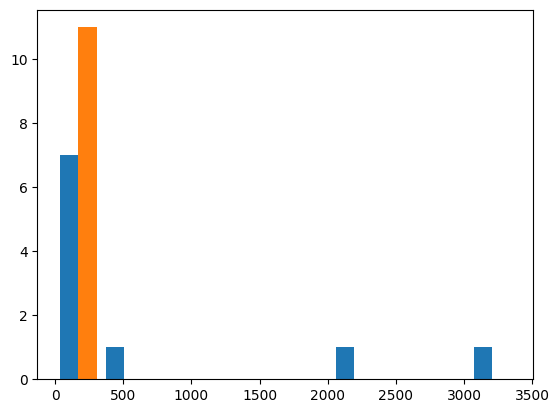

In [16]:
data=np.histogram(num["height"])

plt.pyplot.hist(data)

In [17]:
def minkowski_distance(a, b, r):
    return np.sum(np.abs(a - b)**r, axis=1)**(1/r)